# ETS Decomposition

Error Trend Seasonality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = (Error : Level + Noise) + Trend + Seasonality $

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])

In [7]:
print(series)

0       1
1       7
2       9
3       4
4       7
     ... 
94    100
95    104
96    101
97    107
98    105
Length: 99, dtype: int64


In [9]:
result = seasonal_decompose(series, model='additive', period=1)

#freq는 deprecated 된 것 같다.
#찾아보니 period로 대체된 것 같다.

In [12]:
print(result.nobs)
print(result.observed) #원본데이터
print(result.resid) #residual
print(result.seasonal) #계절성
print(result.trend) #trend

(99,)
0       1.0
1       7.0
2       9.0
3       4.0
4       7.0
      ...  
94    100.0
95    104.0
96    101.0
97    107.0
98    105.0
Length: 99, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Name: resid, Length: 99, dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Name: seasonal, Length: 99, dtype: float64
0       1.0
1       7.0
2       9.0
3       4.0
4       7.0
      ...  
94    100.0
95    104.0
96    101.0
97    107.0
98    105.0
Name: trend, Length: 99, dtype: float64


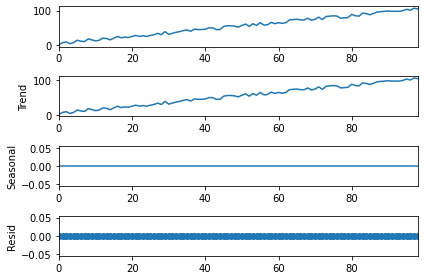

In [13]:
result.plot();

In [14]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

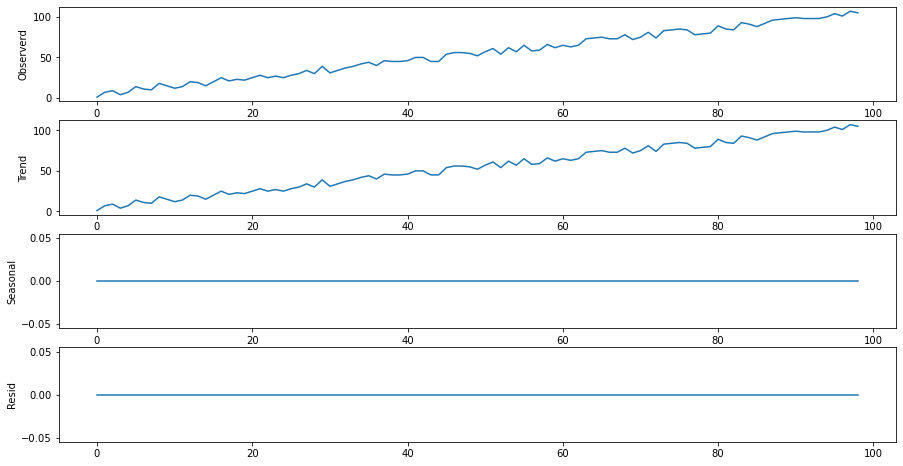

In [15]:
plot_decompose(result)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

In [18]:
series = pd.Series([i**2 for i in range(1,100)])

result = seasonal_decompose(series, model='multiplicative', period=1) # multiplicative

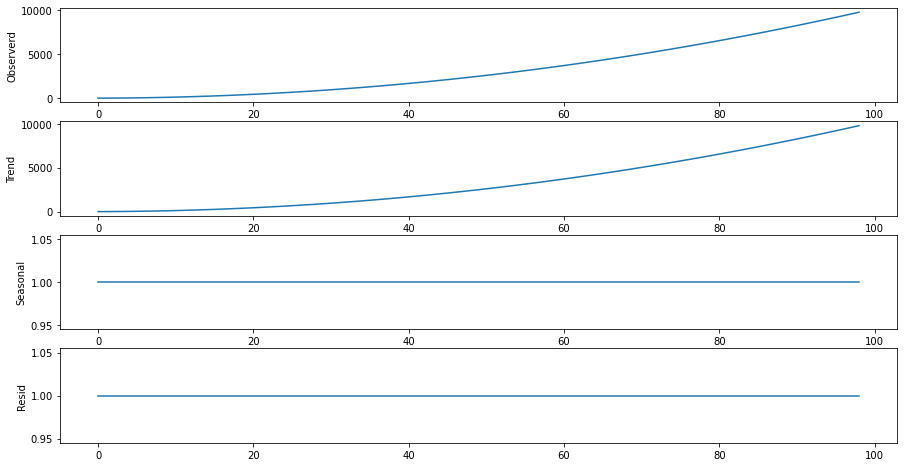

In [19]:
plot_decompose(result)

# 새로운 데이터 입력

In [22]:
airline = pd.read_csv('data/airline_passengers.csv', index_col='Month')

In [24]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


<AxesSubplot:xlabel='Month'>

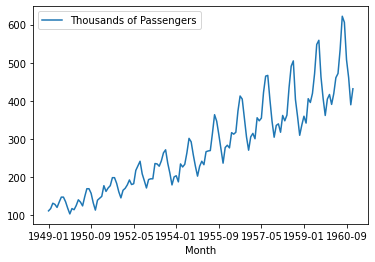

In [21]:
airline.plot()

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [25]:
airline.index = pd.to_datetime(airline.index)

In [26]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

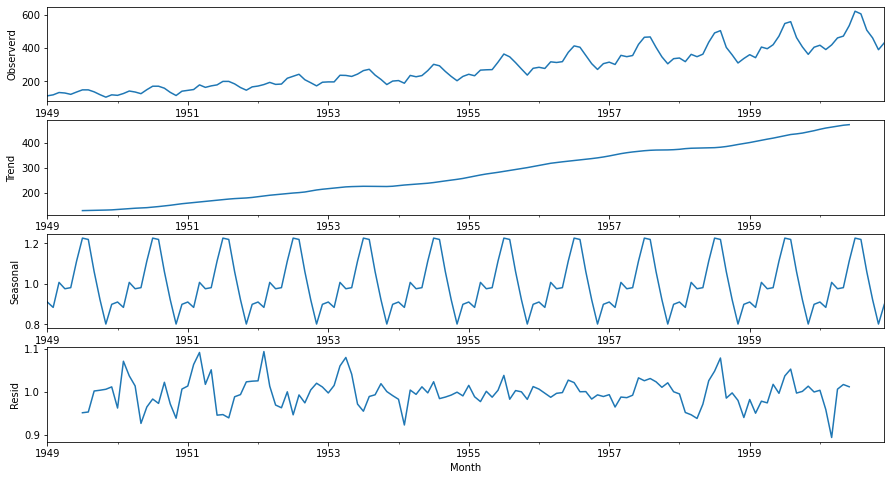

In [28]:
plot_decompose(result)